In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

print(tf.__version__)

2.6.0


In [ ]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
!git clone https://github.com/laxmimerit/Movies-Poster_Dataset.git

fatal: destination path 'Movies-Poster_Dataset' already exists and is not an empty directory.


TQDM

Yinelenebilir herhangi bir şeyin etrafına sararak akıllı bir ilerleme çubuğu çıkarmanıza olanak tanıyan bir Python kitaplığıdır. Bir tqdm ilerleme çubuğu, size yalnızca ne kadar zamanın geçtiğini değil, aynı zamanda yinelenebilir süre için kalan tahmini süreyi de gösterir.

In [ ]:
path = "/content/Movies-Poster_Dataset/train.csv"

data = pd.read_csv(path)
print("DataFrame Shape : {}".format(data.shape))

DataFrame Shape : (7254, 27)


In [ ]:
data.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
from tensorflow.keras.preprocessing import image

img_width = 350
img_height = 350

X = []

for i in tqdm(range(int(data.shape[0] / 2))):

    image_path = "/content/Movies-Poster_Dataset/Images/" + data["Id"][i] + ".jpg"
    img = image.load_img(image_path, target_size = (img_width ,img_height, 3))
    img = image.img_to_array(img)
    img = img / 255.0
    X.append(img)

X = np.array(X)

print()
print("DataFrame Shape : {}".format(data.shape))
print()
print("X Shape : {}".format(X.shape))

100%|██████████| 3627/3627 [00:19<00:00, 189.83it/s]


DataFrame Shape : (7254, 27)

X Shape : (3627, 350, 350, 3)


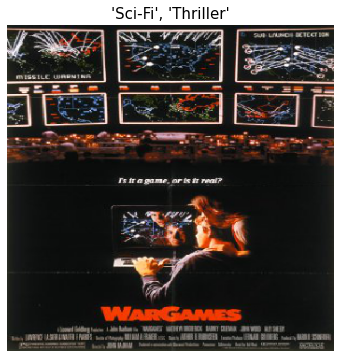

In [ ]:
def img_show(index):
    plt.figure(figsize = (15,6))
    plt.imshow(X[index])
    plt.title(data["Genre"][index].strip("[]"), fontsize = 15)
    plt.axis("off")
    plt.show()

img_show(index = 3 )

In [ ]:
y = data.drop(["Id","Genre"], axis = 1).iloc[:X.shape[0]]
y = y.to_numpy()

print("y Shape : {}".format(y.shape))
print()
print("X Shape : {}".format(X.shape))

y Shape : (3627, 25)

X Shape : (3627, 350, 350, 3)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [ ]:
X[0].shape

(350, 350, 3)

# Build CNN

In [ ]:
model = Sequential()

model.add(Conv2D(filters = 16, kernel_size = (3,3), activation= "relu", input_shape = (350, 350, 3)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters = 32, kernel_size = (3,3), activation= "relu" ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate=0.3))

model.add(Conv2D(filters = 64, kernel_size = (3,3), activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate=0.4))

model.add(Conv2D(filters = 128, kernel_size = (3,3), activation= "relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2,2)))
model.add(Dropout(rate=0.5))

model.add(Flatten())

model.add(Dense(units = 128, activation = "relu"))
model.add(BatchNormalization())
model.add(Dropout(rate = 0.5))

# Çıktı olarak 25 Değer istiyoruz ve hepsi 1,0 o yüzden sigmoid
model.add(Dense(25, activation = "sigmoid"))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 348, 348, 16)      448       
_________________________________________________________________
batch_normalization (BatchNo (None, 348, 348, 16)      64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 174, 174, 16)      0         
_________________________________________________________________
dropout (Dropout)            (None, 174, 174, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 172, 172, 32)      4640      
_________________________________________________________________
batch_normalization_1 (Batch (None, 172, 172, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 86, 86, 32)        0

In [ ]:
padding = 0 # 0; Valid Demek 1 ;  Same Demek 
filter = 3
stride = 1
size = 350

# Formula
((size + 2*padding - filter) / (stride)) + 1

348.0

In [ ]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

# Accuracy için epochs yüksek tutabiliriz !!

history = model.fit(X_train, y_train, epochs = 5 , validation_data = (X_test, y_test))

Epoch 1/5
91/91 [==============================] - 536s 6s/step - loss: 0.7133 - accuracy: 0.1248 - val_loss: 0.5879 - val_accuracy: 0.0895
Epoch 2/5
91/91 [==============================] - 532s 6s/step - loss: 0.3957 - accuracy: 0.2516 - val_loss: 0.6591 - val_accuracy: 0.1804
Epoch 3/5
91/91 [==============================] - 537s 6s/step - loss: 0.2695 - accuracy: 0.3292 - val_loss: 0.3029 - val_accuracy: 0.2287
Epoch 4/5
91/91 [==============================] - 541s 6s/step - loss: 0.2502 - accuracy: 0.3323 - val_loss: 0.2839 - val_accuracy: 0.2287
Epoch 5/5
91/91 [==============================] - 543s 6s/step - loss: 0.2359 - accuracy: 0.3654 - val_loss: 0.2612 - val_accuracy: 0.2300


In [ ]:
from tensorflow.keras.models import save_model

save_model(model,filepath="/content/")

INFO:tensorflow:Assets written to: /content/assets


In [ ]:
def history_graph(history,epochs):

    plt.figure(figsize = (15,6))
    size = 16

    plt.subplot(1,2,1)
    plt.plot(range(1,epochs +1), history.history["accuracy"], label = "Train")
    plt.plot(range(1,epochs +1), history.history["val_accuracy"], label = "Test")
    plt.legend(loc = "best")
    plt.xlabel("Epochs Range", fontsize = size)
    plt.ylabel("Accuracy Score ", fontsize = size)
    plt.title("Accuracy Graph" ,fontsize = size)

    plt.subplot(1,2,2)
    plt.plot(range(1,epochs +1), history.history["loss"], label = "Train")
    plt.plot(range(1,epochs +1), history.history["val_loss"], label = "Test")
    plt.legend(loc = "best")
    plt.xlabel("Epochs Range", fontsize = size)
    plt.ylabel("Loss Score ", fontsize = size)
    plt.title("Loss Graph" ,fontsize = size)

    plt.tight_layout()
    plt.show()

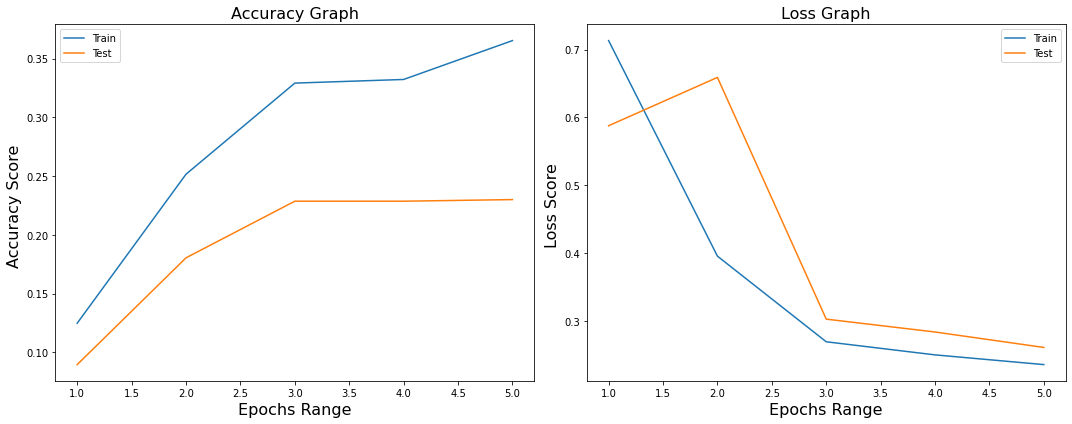

In [ ]:
history_graph(history,5)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([[1.25208646e-01, 2.95110643e-01, 7.43071437e-02, ...,
        1.36453897e-01, 1.51892602e-02, 2.65894532e-02],
       [6.21755123e-02, 2.24929690e-01, 6.43196106e-02, ...,
        2.08720505e-01, 2.59196162e-02, 3.15510035e-02],
       [6.26425445e-02, 1.77529424e-01, 4.56566215e-02, ...,
        2.18899816e-01, 3.22679281e-02, 1.82828307e-02],
       ...,
       [1.62136286e-01, 1.30931884e-01, 2.63909996e-02, ...,
        2.04036772e-01, 2.40840316e-02, 1.95287764e-02],
       [1.92188323e-02, 2.22530961e-02, 1.74373388e-04, ...,
        1.04490936e-01, 2.85238028e-04, 2.84162961e-05],
       [2.81586081e-01, 1.94022745e-01, 2.25192606e-02, ...,
        2.67731965e-01, 2.67896652e-02, 2.69893408e-02]], dtype=float32)

In [ ]:
y_pred[0]

array([0.12520865, 0.29511064, 0.07430714, 0.10887462, 0.19802171,
       0.10159907, 0.01613063, 0.5694872 , 0.12443855, 0.21040776,
       0.06090933, 0.06468022, 0.02122858, 0.02247399, 0.07254592,
       0.00883192, 0.01528263, 0.02363795, 0.18845966, 0.04782075,
       0.01164868, 0.03741169, 0.1364539 , 0.01518926, 0.02658945],
      dtype=float32)

In [ ]:
# Küçükten büyüğe doğru yerlerini sıraladı !!!!
# Sıraları oluyor değerler
np.argsort(y_pred[0])

array([15, 20, 23, 16,  6, 12, 13, 17, 24, 21, 19, 10, 11, 14,  2,  5,  3,
        8,  0, 22, 18,  4,  9,  1,  7])

In [ ]:
def predict_img(path):

    img_width = 350
    img_height = 350

    img = image.load_img(path , target_size = (img_width, img_height, 3))
    plt.figure(figsize = (15,6))
    plt.imshow(img)

    # Test Kısmı
    img = image.img_to_array(img)
    img = img / 255.0
    img = img.reshape(1 , img_width, img_height, 3)

    # Test Predict 
    genre = data.columns[2:]
    y_prob = model.predict(img)
    top3 = np.argsort(y_prob[0])[-4:-1]

    genre_list = []

    for i in top3:
        genre_list.append(genre[i])

    plt.title(genre_list, fontsize = 15)
    plt.axis("off")
    plt.show()

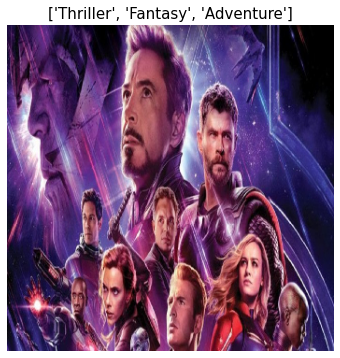

In [ ]:
path_endgame = "/content/Movies-Poster_Dataset/endgame.jpg"
path_saaho = "/content/Movies-Poster_Dataset/saaho.jpg"
path_fast = "/content/Movies-Poster_Dataset/fast.jpg"

predict_img(path_new)

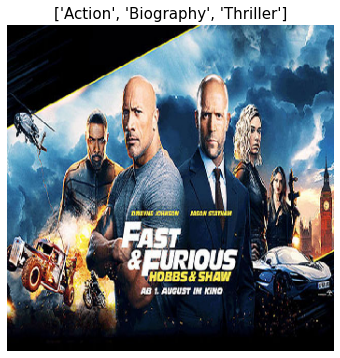

In [ ]:
predict_img(path_fast)

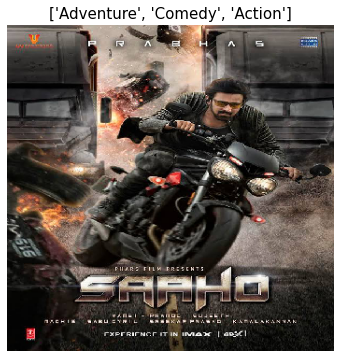

In [ ]:
predict_img(path_saaho)